# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
num_df=df.select_dtypes(include=['int64','float'])
num_df
cat_df=df.select_dtypes(include='object')
cat_df

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India
...,...,...,...,...
49995,Internet,RoundTrip,PERPNH,Australia
49996,Internet,RoundTrip,PERPNH,Australia
49997,Internet,RoundTrip,PERPNH,Australia
49998,Internet,RoundTrip,PERPNH,Australia


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

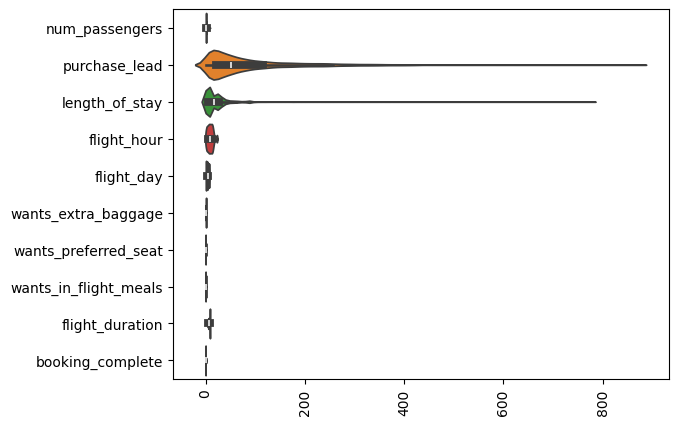

In [ ]:
sns.violinplot(num_df,orient='h')
plt.xticks(rotation=90)

In [ ]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

<Axes: >

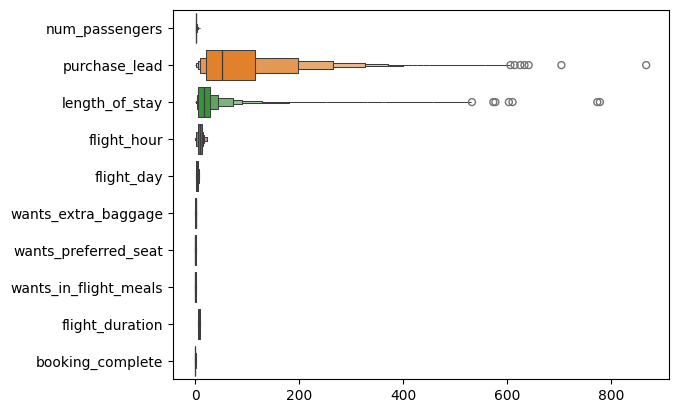

In [ ]:
sns.boxenplot(num_df,orient='h')

<Axes: xlabel='count', ylabel='trip_type'>

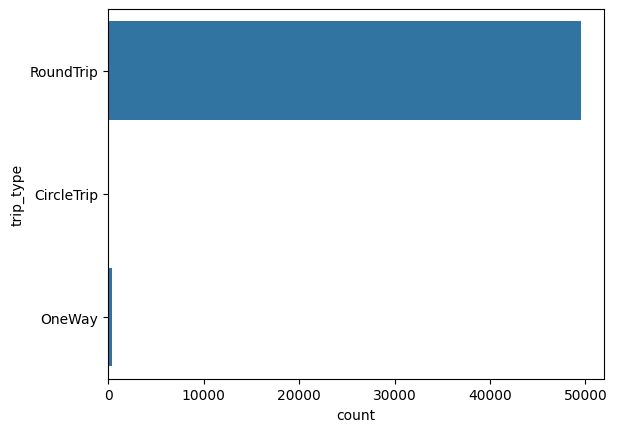

In [ ]:
sns.countplot(cat_df['trip_type'])

<Axes: xlabel='count', ylabel='sales_channel'>

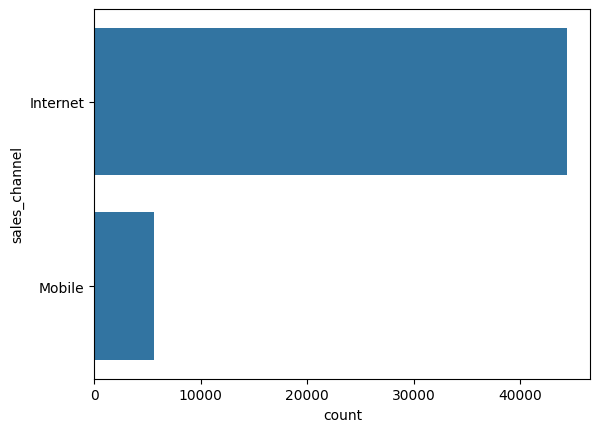

In [ ]:
sns.countplot(cat_df['sales_channel'])

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Top 5 Countries with the most bookings


Text(0.5, 1.0, 'Top 5 Countries with most bookings( yes and no both)')

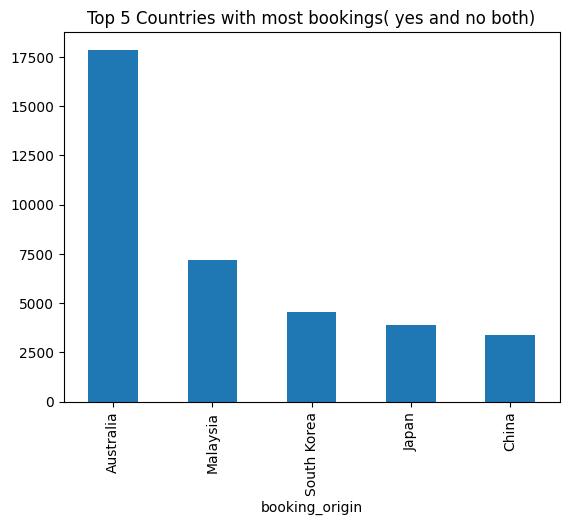

In [ ]:
country_counts=cat_df['booking_origin'].value_counts().sort_values()
print('Top 5 Countries with the most bookings')
altogether_complete=df['booking_origin'].value_counts().nlargest(5)
altogether_complete.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Top 5 Countries with most bookings( yes and no both)')

In [ ]:
country_counts[country_counts<50].value_counts()

,count
count,
1,27
2,8
9,6
8,6
3,4
4,3
6,3
5,3
7,3


Text(0.5, 1.0, 'Top 5 countries with bookings completed')

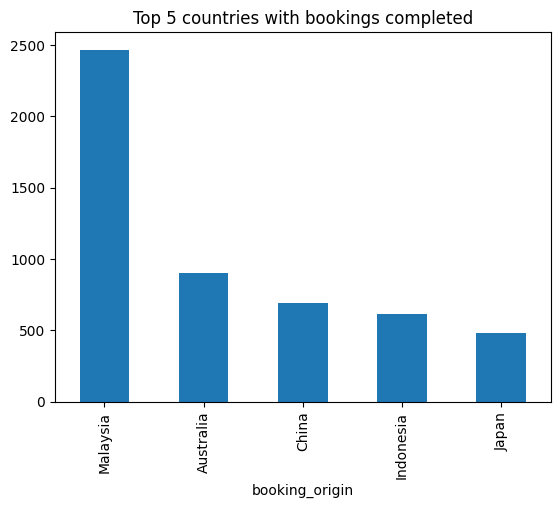

In [ ]:
booking_yes['booking_origin'].value_counts().nlargest(5).plot(kind='bar',colormap='tab10')
plt.title('Top 5 countries with bookings completed')

In [ ]:
booking_yes=df[df['booking_complete']==1]
booking_yes.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.0
mean,1.649906,80.167157,19.617679,9.158331,3.781225,0.745253,0.351565,0.458411,6.898258,1.0
std,1.065807,89.836401,33.909567,5.236860,1.969952,0.435748,0.477491,0.498301,1.528183,0.0
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,1.0
25%,1.000000,18.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.520000,1.0
50%,1.000000,46.000000,6.000000,9.000000,4.000000,1.000000,0.000000,0.000000,6.620000,1.0
75%,2.000000,106.000000,23.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.670000,1.0
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.0


average stay length (in days) of people who completed their booking: 19.61767852366943


<Axes: xlabel='length_of_stay', ylabel='Count'>

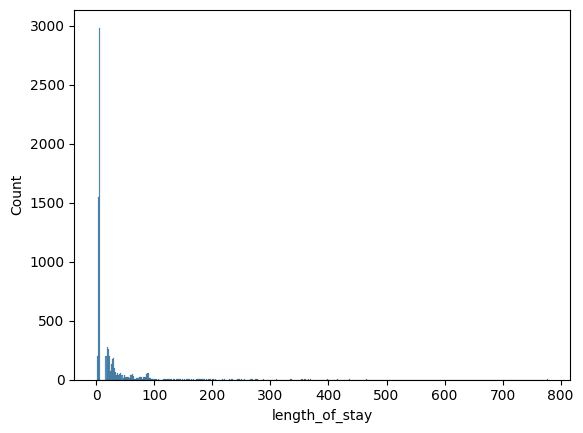

In [ ]:
print(f"average stay length (in days) of people who completed their booking: {booking_yes['length_of_stay'].mean()}")
sns.histplot(booking_yes['length_of_stay'])

average flight hours of people who completed their booking: 9.158331104573415


<Axes: xlabel='flight_hour', ylabel='Count'>

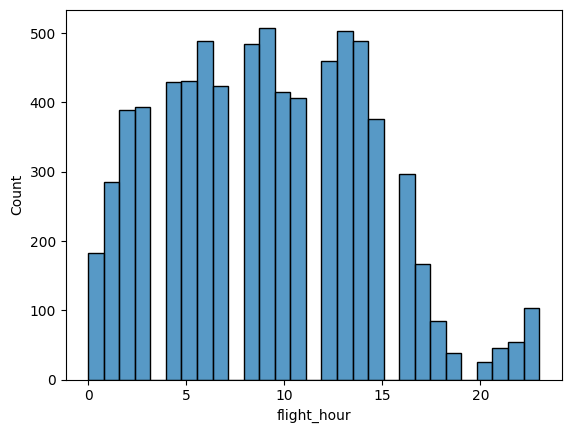

In [ ]:
print(f"average flight hours of people who completed their booking: {booking_yes['flight_hour'].mean()}")
sns.histplot(booking_yes['flight_hour'])

Most common route used by people with complete bookings: 0    AKLKUL
Name: route, dtype: object


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02,567.0
mean,1.701940,125.059965,27.019400,9.287478,3.918871,0.749559,0.296296,0.537919,8.830000e+00,1.0
std,1.057221,106.146575,39.342897,5.241541,2.037748,0.433650,0.457026,0.499000,5.333776e-14,0.0
min,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.830000e+00,1.0
25%,1.000000,40.000000,6.000000,5.000000,2.000000,0.500000,0.000000,0.000000,8.830000e+00,1.0
50%,1.000000,96.000000,19.000000,9.000000,4.000000,1.000000,0.000000,1.000000,8.830000e+00,1.0
75%,2.000000,188.500000,29.500000,13.000000,6.000000,1.000000,1.000000,1.000000,8.830000e+00,1.0
max,8.000000,641.000000,465.000000,23.000000,7.000000,1.000000,1.000000,1.000000,8.830000e+00,1.0


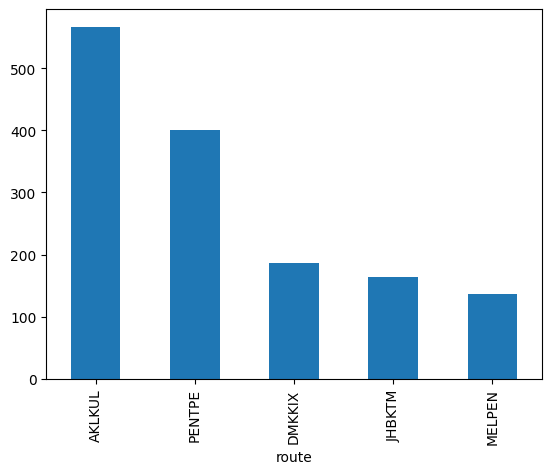

In [ ]:
print(f"Most common route used by people with complete bookings: {booking_yes['route'].mode()}")
booking_yes['route'].value_counts().nlargest(5).plot(kind='bar')
most_common_route=booking_yes[booking_yes['route']=='AKLKUL']
most_common_route.describe()
most_common_route.describe()

<Axes: xlabel='wants_in_flight_meals'>

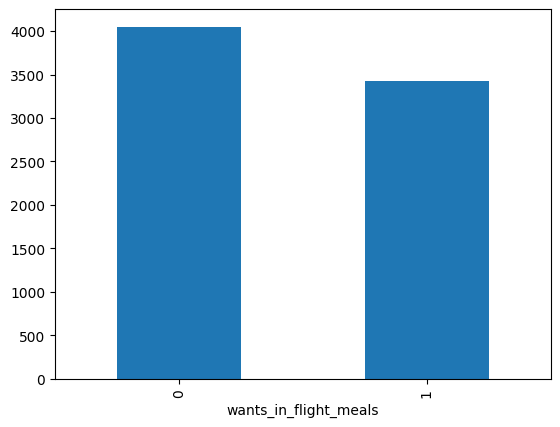

In [ ]:
booking_yes['wants_in_flight_meals'].value_counts().plot(kind='bar')

In [ ]:
print(f"Most common day of departure for passengers with complete bookings: {booking_yes['flight_day'].mode()}")
print(f"Most common day of departure for passengers: {df['flight_day'].mode()}")

Most common day of departure for passengers with complete bookings: 0    3
Name: flight_day, dtype: int64
Most common day of departure for passengers: 0    1
Name: flight_day, dtype: int64


<Axes: xlabel='wants_extra_baggage'>

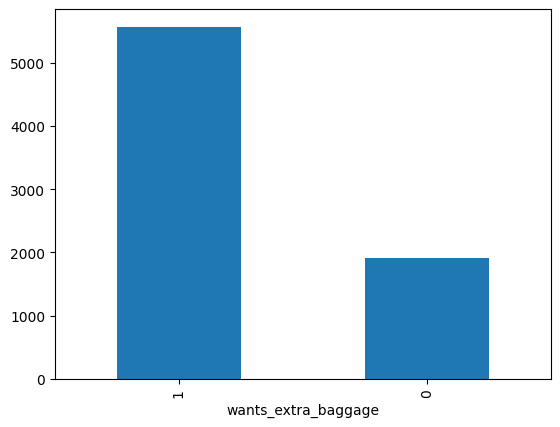

In [ ]:
booking_yes['wants_extra_baggage'].value_counts().plot(kind='bar')

<Axes: xlabel='wants_preferred_seat'>

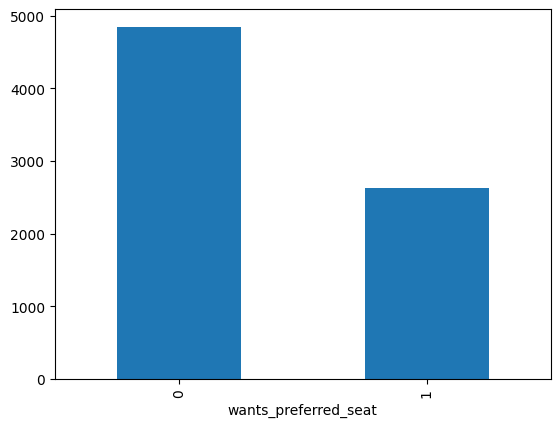

In [ ]:
booking_yes['wants_preferred_seat'].value_counts().plot(kind='bar')

Average flight duration for passengers with complete bookings: 6.898257555496122


<Axes: xlabel='flight_duration', ylabel='Count'>

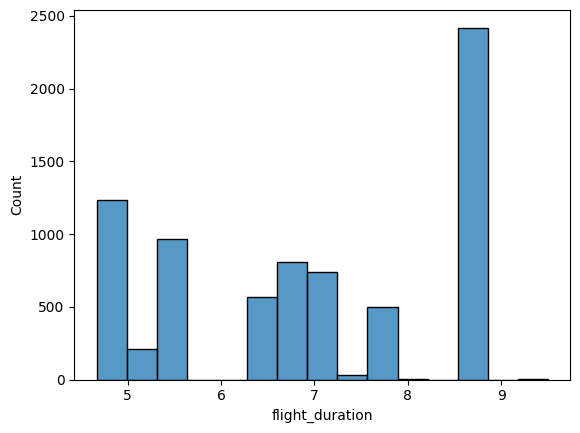

In [ ]:
print(f"Average flight duration for passengers with complete bookings: {booking_yes['flight_duration'].mean()}")
sns.histplot(booking_yes['flight_duration'])

Average number of passengers for passengers with complete bookings: 6.898257555496122


<Axes: xlabel='num_passengers'>

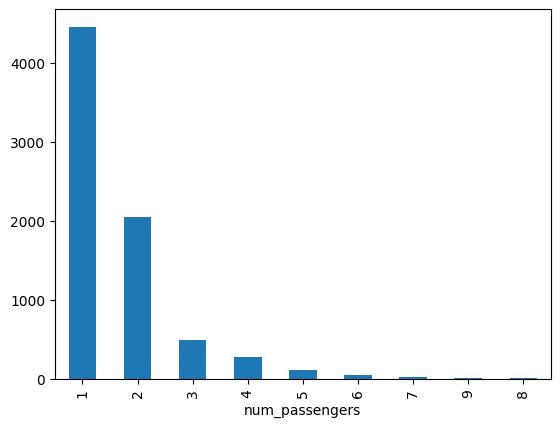

In [ ]:
print(f"Average number of passengers for passengers with complete bookings: {booking_yes['flight_duration'].mean()}")
booking_yes['num_passengers'].value_counts().plot(kind='bar')

Feature Engineering

In [ ]:
Urgent_Booking=[]
for i in df['purchase_lead']:
  if i<=7:
    Urgent_Booking.append(1)
  else:
    Urgent_Booking.append(0)
df['Urgent_Booking']=Urgent_Booking

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

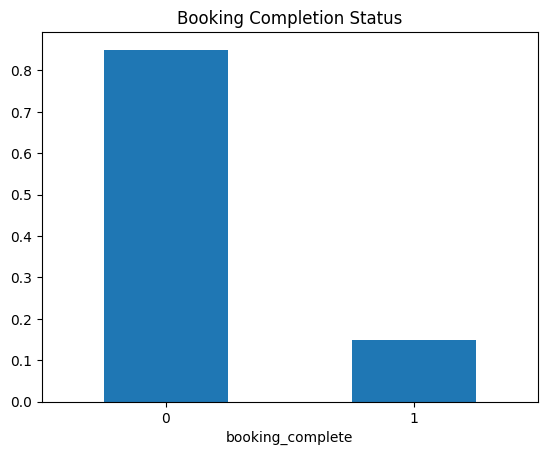

In [ ]:
df['booking_complete'].value_counts(normalize=True).plot(kind='bar')
plt.title('Booking Completion Status')
plt.xticks(rotation=0)
#class inmbalance approx 88% (no) and 12% (yes)

In [ ]:
matrix=num_df.corr()
matrix['booking_complete']

,booking_complete
num_passengers,0.024116
purchase_lead,-0.022131
length_of_stay,-0.042408
flight_hour,0.007127
flight_day,-0.006986
wants_extra_baggage,0.068139
wants_preferred_seat,0.050116
wants_in_flight_meals,0.026511
flight_duration,-0.106266
booking_complete,1.000000


Model Training

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
cat_df_encoded = encoder.fit_transform(cat_df)
cat_df_encoded = pd.DataFrame(cat_df_encoded.toarray(), columns=encoder.get_feature_names_out(cat_df.columns))
cat_df_encoded.head()

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
combined_df = pd.concat([pd.DataFrame(num_df, columns=num_df.columns), cat_df_encoded], axis=1)
combined_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,112,20,3,6,0,0,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,243,22,17,3,1,1,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,96,31,4,6,0,0,1,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,68,22,15,3,1,0,1,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8518
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.50      0.08      0.14      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.53      0.53     10000
weighted avg       0.81      0.85      0.80     10000

Confusion Matrix:
[[8395  125]
 [1357  123]]


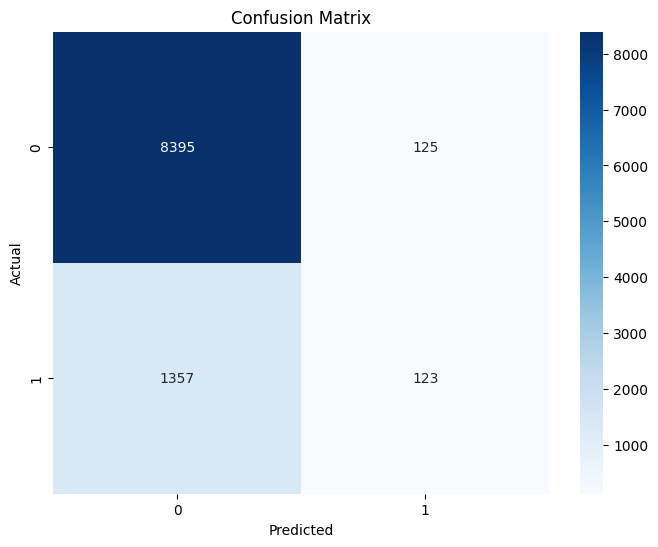

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = combined_df.drop('booking_complete', axis=1)
y = combined_df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:24:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8545
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.55      0.10      0.16      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000

XGBoost Confusion Matrix:
[[8402  118]
 [1337  143]]


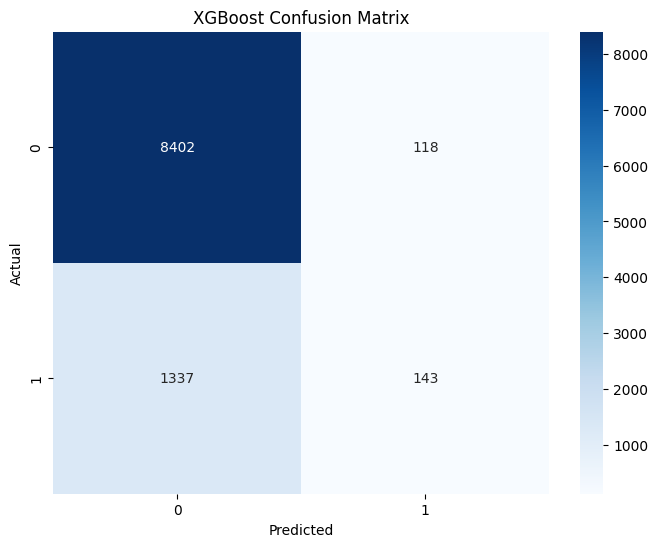

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Training an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))
print('XGBoost Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))
# Visualizing the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.8536
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000

Random Forest Confusion Matrix:
[[8323  197]
 [1267  213]]


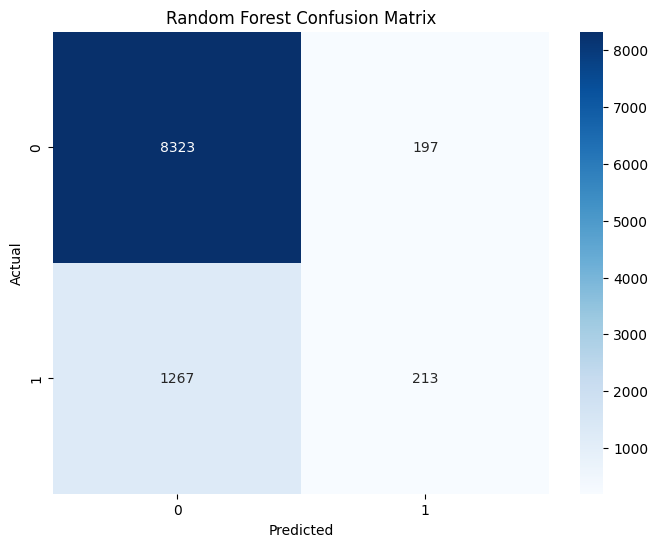

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
# Visualizing the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest (SMOTE) Accuracy: 0.9136339584925628
Random Forest (SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8444
           1       0.96      0.87      0.91      8565

    accuracy                           0.91     17009
   macro avg       0.92      0.91      0.91     17009
weighted avg       0.92      0.91      0.91     17009

Random Forest (SMOTE) Confusion Matrix:
[[8103  341]
 [1128 7437]]


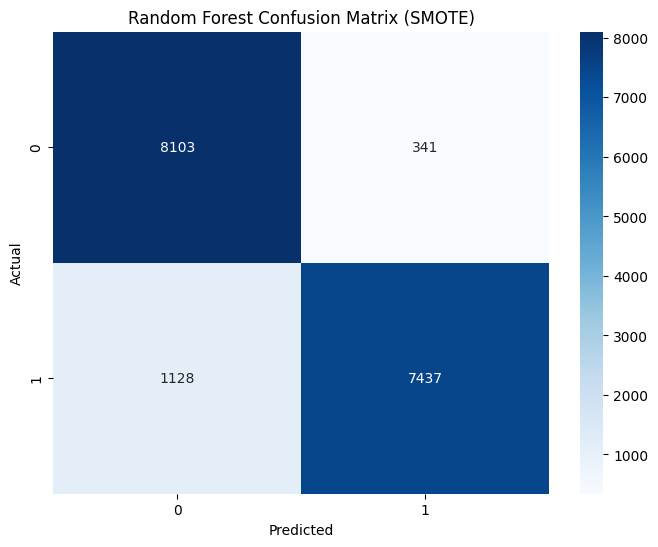

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train Random Forest on the SMOTE-resampled data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test_smote)

print(f'Random Forest (SMOTE) Accuracy: {accuracy_score(y_test_smote, y_pred_rf_smote)}')
print('Random Forest (SMOTE) Classification Report:')
print(classification_report(y_test_smote, y_pred_rf_smote))
print('Random Forest (SMOTE) Confusion Matrix:')
print(confusion_matrix(y_test_smote, y_pred_rf_smote))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_smote, y_pred_rf_smote), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (SMOTE)')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:27:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (SMOTE) Accuracy: 0.8936445411252866
XGBoost (SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8444
           1       0.94      0.84      0.89      8565

    accuracy                           0.89     17009
   macro avg       0.90      0.89      0.89     17009
weighted avg       0.90      0.89      0.89     17009

XGBoost (SMOTE) Confusion Matrix:
[[8021  423]
 [1386 7179]]


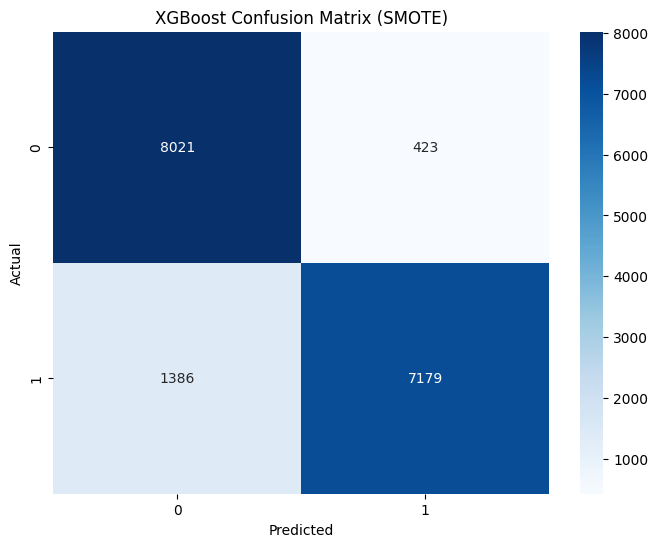

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define X and y again in this cell
X = combined_df.drop('booking_complete', axis=1)
y = combined_df['booking_complete']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train XGBoost on the SMOTE-resampled data
xgb_model_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_model_smote.predict(X_test_smote)

print(f'XGBoost (SMOTE) Accuracy: {accuracy_score(y_test_smote, y_pred_xgb_smote)}')
print('XGBoost (SMOTE) Classification Report:')
print(classification_report(y_test_smote, y_pred_xgb_smote))
print('XGBoost (SMOTE) Confusion Matrix:')
print(confusion_matrix(y_test_smote, y_pred_xgb_smote))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_smote, y_pred_xgb_smote), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (SMOTE)')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import CategoricalDtype

# Load the dataset
file_path = 'British Airways Summer Schedule Dataset - Forage Data Science Task 1.xlsx'
data = pd.read_excel(file_path, sheet_name='british_airways_schedule_summer')

# Define groupings
def categorize_time_of_day(time_obj):
    # The input time_obj is already a datetime.time object
    time = time_obj
    if time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 14:
        return 'Lunchtime'
    elif 14 <= time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to the 'FLIGHT_TIME' column
# Ensure the 'FLIGHT_TIME' column is of datetime.time type if not already
# Based on the error, it seems it already is, but explicitly converting can prevent issues
# if the data type changes unexpectedly.
data['TIME_CATEGORY'] = data['FLIGHT_TIME'].apply(categorize_time_of_day)

# Group by TIME_CATEGORY, HAUL, and ARRIVAL_REGION
grouped = data.groupby(['TIME_CATEGORY', 'HAUL', 'ARRIVAL_REGION'])

# Calculate total passengers and sum of eligible passengers for each tier in each group
def calculate_proportions(group):
    total_pax = (group['FIRST_CLASS_SEATS'] + group['BUSINESS_CLASS_SEATS'] + group['ECONOMY_SEATS']).sum()
    tier1_pax = group['TIER1_ELIGIBLE_PAX'].sum()
    tier2_pax = group['TIER2_ELIGIBLE_PAX'].sum()
    tier3_pax = group['TIER3_ELIGIBLE_PAX'].sum()

    return pd.Series({
        'Total_Passengers': total_pax,
        'Tier1_Eligible_Pax': tier1_pax,
        'Tier2_Eligible_Pax': tier2_pax,
        'Tier3_Eligible_Pax': tier3_pax,
        'Tier1_Percentage': (tier1_pax / total_pax) * 100 if total_pax > 0 else 0,
        'Tier2_Percentage': (tier2_pax / total_pax) * 100 if total_pax > 0 else 0,
        'Tier3_Percentage': (tier3_pax / total_pax) * 100 if total_pax > 0 else 0
    })

result = grouped.apply(calculate_proportions).reset_index()

# Create the lookup table
lookup_table = result[['TIME_CATEGORY', 'HAUL', 'ARRIVAL_REGION',
                       'Tier1_Percentage', 'Tier2_Percentage', 'Tier3_Percentage']]

# Round the percentages for readability
lookup_table['Tier1_Percentage'] = lookup_table['Tier1_Percentage'].round(2)
lookup_table['Tier2_Percentage'] = lookup_table['Tier2_Percentage'].round(2)
lookup_table['Tier3_Percentage'] = lookup_table['Tier3_Percentage'].round(2)

# Display the lookup table
print(lookup_table)

# Optionally, save the lookup table to a CSV file
lookup_table.to_csv('lounge_eligibility_lookup_table.csv', index=False)

   TIME_CATEGORY   HAUL ARRIVAL_REGION  Tier1_Percentage  Tier2_Percentage  \
0      Afternoon   LONG           Asia              0.17              2.88   
1      Afternoon   LONG    Middle East              0.21              2.67   
2      Afternoon   LONG  North America              0.20              2.76   
3      Afternoon  SHORT         Europe              0.34              4.31   
4        Evening   LONG           Asia              0.20              2.69   
5        Evening   LONG    Middle East              0.22              2.59   
6        Evening   LONG  North America              0.21              2.69   
7        Evening  SHORT         Europe              0.33              4.45   
8      Lunchtime   LONG           Asia              0.15              2.55   
9      Lunchtime   LONG    Middle East              0.19              2.70   
10     Lunchtime   LONG  North America              0.18              2.76   
11     Lunchtime  SHORT         Europe              0.39        

<ipython-input-79-8a40e71a6332>:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(calculate_proportions).reset_index()
<ipython-input-79-8a40e71a6332>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lookup_table['Tier1_Percentage'] = lookup_table['Tier1_Percentage'].round(2)
<ipython-input-79-8a40e71a6332>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i